<a href="https://colab.research.google.com/github/alok1409/British-Airways-Virtual-Internship-/blob/main/British_Airways_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 11
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My husband and I booked seat...
1,"Not Verified | May 3, flew from Seattle to He..."
2,✅ Trip Verified | I went through three flights...
3,✅ Trip Verified | An excellent flight in Club ...
4,✅ Trip Verified | The flight schedule was dela...


In [4]:
df.to_csv("BA_reviews.csv")

In [ ]:
df = pd.read_csv("BA_reviews.csv")

In [ ]:
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Top Ten REASONS to not use Brit...
1,1,Not Verified | Easy check in on the way to He...
2,2,✅ Trip Verified | Online check in worked fine...
3,3,✅ Trip Verified |. The BA first lounge at Term...
4,4,Not Verified | Paid a quick visit to Nice yest...


In [ ]:
df = df.drop(df.columns[0], axis=1)

In [ ]:
df.head()

,reviews
0,Not Verified | Top Ten REASONS to not use Brit...
1,Not Verified | Easy check in on the way to He...
2,✅ Trip Verified | Online check in worked fine...
3,✅ Trip Verified |. The BA first lounge at Term...
4,Not Verified | Paid a quick visit to Nice yest...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
# Cleaning the text

import re

def clean(text):
    text = re.sub('[^A-za-z]+',' ',str(text))
    return text

df["clean_reviews"] = df["reviews"].apply(clean)
df.head()

,reviews,clean_reviews
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...
1,Easy check in on the way to Heathrow. The fl...,Easy check in on the way to Heathrow The flig...
2,Online check in worked fine. Quick security ...,Online check in worked fine Quick security ch...
3,. The BA first lounge at Terminal 5 was a zoo...,The BA first lounge at Terminal was a zoo at ...
4,Paid a quick visit to Nice yesterday from Hea...,Paid a quick visit to Nice yesterday from Hea...


In [ ]:
# tokenisation, POS tagging, stopwords removal and stemming and lemmatization

import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['clean_reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,clean_reviews,POS tagged
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...,"[(Top, a), (Ten, n), (REASONS, n), (use, v), (..."
1,Easy check in on the way to Heathrow. The fl...,Easy check in on the way to Heathrow The flig...,"[(Easy, a), (check, n), (way, n), (Heathrow, v..."
2,Online check in worked fine. Quick security ...,Online check in worked fine Quick security ch...,"[(Online, n), (check, n), (worked, a), (fine, ..."
3,. The BA first lounge at Terminal 5 was a zoo...,The BA first lounge at Terminal was a zoo at ...,"[(BA, n), (first, a), (lounge, n), (Terminal, ..."
4,Paid a quick visit to Nice yesterday from Hea...,Paid a quick visit to Nice yesterday from Hea...,"[(Paid, v), (quick, a), (visit, n), (Nice, n),..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,clean_reviews,POS tagged,Lemma
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...,"[(Top, a), (Ten, n), (REASONS, n), (use, v), (...",Top Ten REASONS use British Airways Aware No...
1,Easy check in on the way to Heathrow. The fl...,Easy check in on the way to Heathrow The flig...,"[(Easy, a), (check, n), (way, n), (Heathrow, v...",Easy check way Heathrow flight time issue re...
2,Online check in worked fine. Quick security ...,Online check in worked fine Quick security ch...,"[(Online, n), (check, n), (worked, a), (fine, ...",Online check worked fine Quick security chec...
3,. The BA first lounge at Terminal 5 was a zoo...,The BA first lounge at Terminal was a zoo at ...,"[(BA, n), (first, a), (lounge, n), (Terminal, ...",BA first lounge Terminal zoo pm dirty table ...
4,Paid a quick visit to Nice yesterday from Hea...,Paid a quick visit to Nice yesterday from Hea...,"[(Paid, v), (quick, a), (visit, n), (Nice, n),...",Paid quick visit Nice yesterday Heathrow Dec...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS use British Airways Aware No...
1,Easy check in on the way to Heathrow. The fl...,Easy check way Heathrow flight time issue re...
2,Online check in worked fine. Quick security ...,Online check worked fine Quick security chec...
3,. The BA first lounge at Terminal 5 was a zoo...,BA first lounge Terminal zoo pm dirty table ...
4,Paid a quick visit to Nice yesterday from Hea...,Paid quick visit Nice yesterday Heathrow Dec...
...,...,...
1095,I have been flying with BA for the last 32 ye...,fly BA last year Sao Paulo London mostly BA ...
1096,I traveled on British Airways with my wife fr...,travel British Airways wife Dallas Lagos Nig...
1097,Flew British Airways from Budapest to London ...,Flew British Airways Budapest London Heathro...
1098,The air conditioning didn’t work in the part ...,air condition work part airplane sit hot sta...


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,clean_reviews,POS tagged,Lemma,Sentiment,Analysis
0,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...,"[(Top, a), (Ten, n), (REASONS, n), (use, v), (...",Top Ten REASONS use British Airways Aware No...,0.6917,Positive
1,Easy check in on the way to Heathrow. The fl...,Easy check in on the way to Heathrow The flig...,"[(Easy, a), (check, n), (way, n), (Heathrow, v...",Easy check way Heathrow flight time issue re...,0.4939,Neutral
2,Online check in worked fine. Quick security ...,Online check in worked fine Quick security ch...,"[(Online, n), (check, n), (worked, a), (fine, ...",Online check worked fine Quick security chec...,0.8360,Positive
3,. The BA first lounge at Terminal 5 was a zoo...,The BA first lounge at Terminal was a zoo at ...,"[(BA, n), (first, a), (lounge, n), (Terminal, ...",BA first lounge Terminal zoo pm dirty table ...,-0.8445,Negative
4,Paid a quick visit to Nice yesterday from Hea...,Paid a quick visit to Nice yesterday from Hea...,"[(Paid, v), (quick, a), (visit, n), (Nice, n),...",Paid quick visit Nice yesterday Heathrow Dec...,0.9504,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    571
Negative    411
Neutral     118
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f584e625390>,
 [Text(-0.06593383781285975, 1.0980221896807312, 'Positive'),
  Text(-0.3008516565825741, -1.058058732174883, 'Negative'),
  Text(1.2740604279758543, -0.44639671354747174, 'Neutral')],
 [Text(-0.03596391153428713, 0.5989211943713079, '51.9%'),
  Text(-0.16410090359049498, -0.5771229448226635, '37.4%'),
  Text(0.8021861953922044, -0.2810645974187785, '10.7%')])

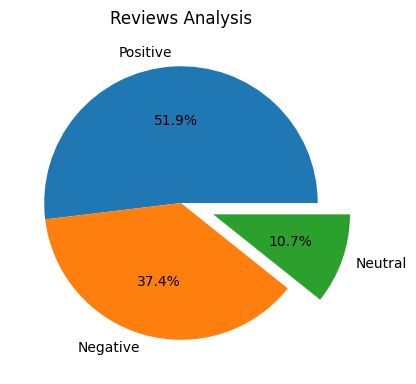

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


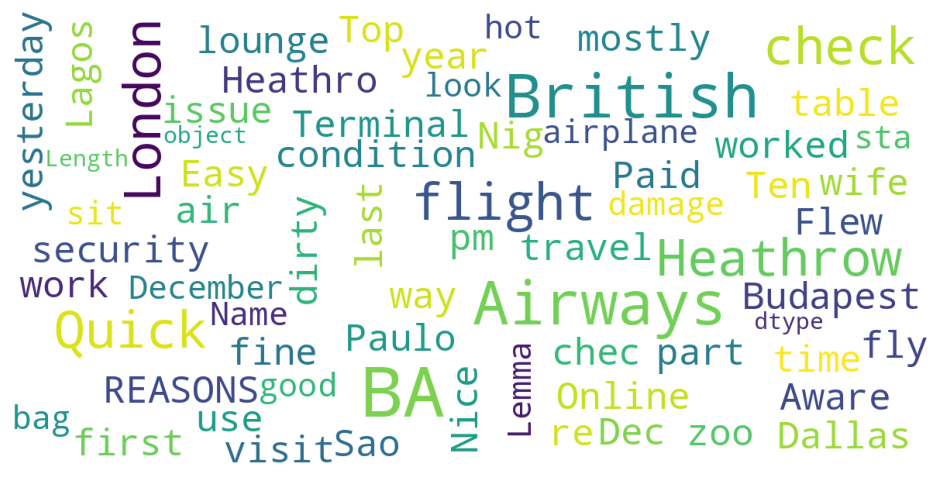

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)